In [1]:
import pandas as pd
import geopandas as gpd
import basedosdados as bd

In [2]:
df = bd.read_table(
    dataset_id='br_inmet_bdmep',
    table_id = 'estacao',
    billing_project_id='estacoes-metereologica')

Downloading: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 612/612 [00:00<00:00, 1462.56rows/s]


In [3]:
df.head()

,id_municipio,id_estacao,estacao,data_fundacao,latitude,longitude,altitude
0,5300108,A001,Brasilia,2000-05-07,-15.789444,-47.925833,1160.96
1,5300108,A042,Brazlandia,2017-07-19,-15.599722,-48.131111,1143.00
2,5300108,A045,Aguas Emendadas,2008-10-03,-15.596491,-47.625801,1030.36
3,5300108,A046,Gama (Ponte Alta),2014-10-01,-15.935278,-48.137500,990.00
4,5300108,A047,Paranoa (Coopa-Df),2017-02-07,-16.012222,-47.557417,1043.00


In [4]:
df.shape

(612, 7)

In [5]:
df.dtypes

id_municipio      object
id_estacao        object
estacao           object
data_fundacao     dbdate
latitude         float64
longitude        float64
altitude         float64
dtype: object

In [8]:
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.longitude, df.latitude)
)

In [9]:
gdf.head()

,id_municipio,id_estacao,estacao,data_fundacao,latitude,longitude,altitude,geometry
0,5300108,A001,Brasilia,2000-05-07,-15.789444,-47.925833,1160.96,POINT (-47.92583 -15.78944)
1,5300108,A042,Brazlandia,2017-07-19,-15.599722,-48.131111,1143.00,POINT (-48.13111 -15.59972)
2,5300108,A045,Aguas Emendadas,2008-10-03,-15.596491,-47.625801,1030.36,POINT (-47.62580 -15.59649)
3,5300108,A046,Gama (Ponte Alta),2014-10-01,-15.935278,-48.137500,990.00,POINT (-48.13750 -15.93528)
4,5300108,A047,Paranoa (Coopa-Df),2017-02-07,-16.012222,-47.557417,1043.00,POINT (-47.55742 -16.01222)


<Axes: >

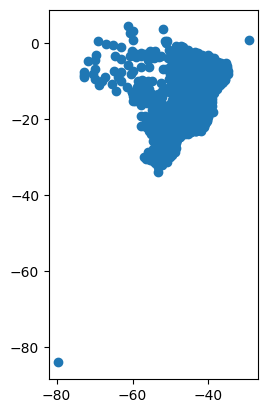

In [10]:
gdf.plot()

In [11]:
import matplotlib.pyplot as plt

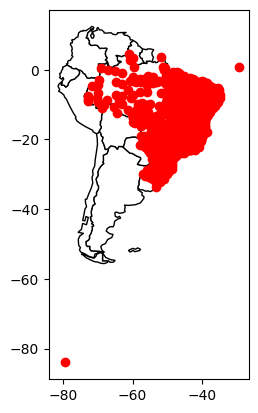

In [13]:
mundo = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

ax = mundo[mundo.continent == 'South America'].plot(
    color='white', edgecolor = 'black')

gdf.plot(ax=ax, color='red')

plt.show()

In [26]:
gdf.head()

,id_municipio,id_estacao,estacao,data_fundacao,latitude,longitude,altitude,geometry
0,5300108,A001,Brasilia,2000-05-07,-15.789444,-47.925833,1160.96,POINT (-47.92583 -15.78944)
1,5300108,A042,Brazlandia,2017-07-19,-15.599722,-48.131111,1143.00,POINT (-48.13111 -15.59972)
2,5300108,A045,Aguas Emendadas,2008-10-03,-15.596491,-47.625801,1030.36,POINT (-47.62580 -15.59649)
3,5300108,A046,Gama (Ponte Alta),2014-10-01,-15.935278,-48.137500,990.00,POINT (-48.13750 -15.93528)
4,5300108,A047,Paranoa (Coopa-Df),2017-02-07,-16.012222,-47.557417,1043.00,POINT (-47.55742 -16.01222)


In [28]:
gdf.loc[gdf['latitude'] < -80]

,id_municipio,id_estacao,estacao,data_fundacao,latitude,longitude,altitude,geometry
589,None,C891,Criosfera,2012-01-09,-84.0,-79.494167,1285.0,POINT (-79.49417 -84.00000)


In [29]:
gdf.query("latitude < -80")

,id_municipio,id_estacao,estacao,data_fundacao,latitude,longitude,altitude,geometry
589,None,C891,Criosfera,2012-01-09,-84.0,-79.494167,1285.0,POINT (-79.49417 -84.00000)
